In [ ]:
!pip install dynamiqs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successf

In [ ]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np

## **Task 1:** Simulating the dynamics of cat qubits at the effective Hamiltonian level

### **Task 1.1:** Simulating the time-evolution of a system comprised of a cat qubit memory (a) and buffer (b).

In [ ]:
na = 20 # Hilbert space dimension
nb = 5

g2 = 1.0
ed = -4.0
kb = 10 # two-photon loss rate

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0)) # initial state

H = (g2 * a @ a @ b.dag()) + (g2 * a.dag() @ a.dag() @ b) + (ed * b) + (ed * b.dag()) # Hamiltonian

# alpha = 2.0 # cat size
T = 4
tsave = np.linspace(0, T, 100)

loss_op = jnp.sqrt(kb) * b

exp_ops = [dq.dag(a) @ a]

res_111 = dq.mesolve(H, [loss_op], psi0, tsave, exp_ops=exp_ops)

|          |   0.2% ◆ elapsed 18.43ms ◆ remaining 0.00ms

100%|██████████| 50/50 [00:10<00:00,  4.73it/s]


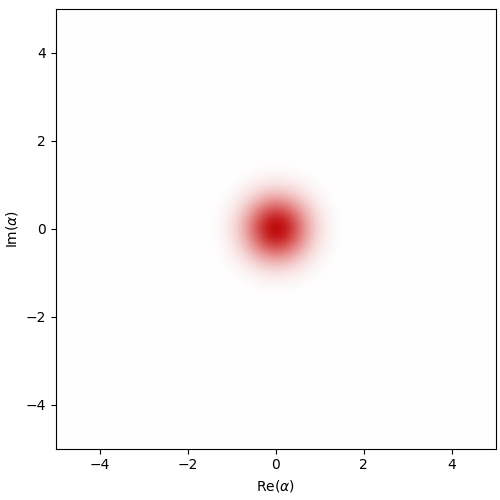

In [ ]:
# @title **Fig. 1.1.1:** Plot of Wigner function of the memory mode $a$ as a function of time
A = dq.ptrace(res_111.states, 0)
dq.plot.wigner_gif(A)

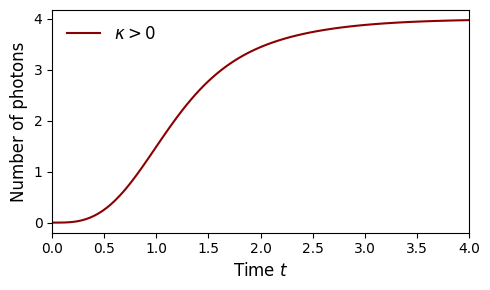

In [ ]:
# @title **Fig. 1.1.2:** Plot of average number of photons as a function of time
plt.rcParams["font.family"] = "sans-serif"

dark_red = "#8B0000"

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(tsave, res_111.expects[0].real, color=dark_red, label=r"$\kappa > 0$")
ax.set_xlim((0, T))

ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)
ax.legend(fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

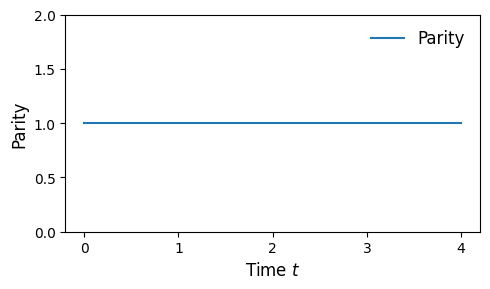

In [ ]:
# @title **Fig. 1.1.3:** Parity of mode $a$ over time
# Define the parity operator for mode a
parity_op = dq.parity(na)

# Compute expectation value of parity over time
parity_values = np.real(dq.expect(parity_op, A))

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(tsave, parity_values, label="Parity")

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 0.5, 1, 1.5, 2])

ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Parity", fontsize=12)
ax.legend(fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


Now, let's see what happens when we increase the buffer size $n_b$ from 5 to 20. We find that tt seems to yield a very similar Wigner plot to the prior case.

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|██████████| 100.0% ◆ elapsed 01m25s ◆ remaining 0.00ms

100%|██████████| 50/50 [01:40<00:00,  2.01s/it]


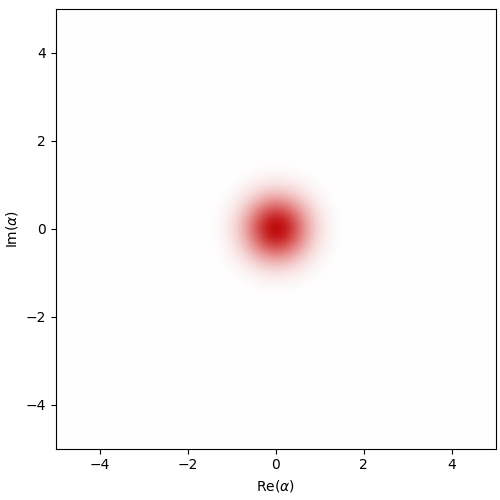

In [ ]:
na = 20 # Hilbert space dimension
nb = 20

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0)) # initial state
# H = dq.zeros(na) # zero Hamiltonian

H_ = (g2 * a @ a @ b.dag()) + (g2 * a.dag() @ a.dag() @ b) + (ed * b) + (ed * b.dag()) # Hamiltonian

# alpha = 2.0 # cat size
T = 4
tsave = np.linspace(0, T, 100)
loss_op_ = jnp.sqrt(kb) * b # dq.tensor(dq.zeros(na), np.sqrt(kb)*dq.destroy(nb)) # dq.tensor(dq.eye(na), np.sqrt(kb)*(dq.destroy(nb) @ dq.destroy(nb) - alpha**2 * dq.eye(nb))) # loss operator

exp_ops = [dq.dag(a) @ a]

res_112 = dq.mesolve(H_, [loss_op_], psi0, tsave, exp_ops=exp_ops)
A = dq.ptrace(res_112.states, 0)
dq.plot.wigner_gif(A)


### **Task 1.2:** Simulating a bufferless adiabatic approximation to the pevious system (which had the two-photon interaction term between the memory and buffer modes).


In [ ]:
# @title Generating the bufferless system. All interactions are modeled by the loss operator

na = 20 # Hilbert space dimension


g2 = 1.0
ed = -4.0
kb = 10 # two-photon loss rate
kappa_2 = 4 * np.abs(g2)**2 / kb
alpha = jnp.sqrt(-ed/(g2)) #NOTE THAT THIS ASSUMES THAT G2 IS REAL

a = dq.destroy(na) # annihilation operator
psi0 = dq.fock(na, 0) # initial state
# H = dq.zeros(na) # zero Hamiltonian

H = dq.zeros(na)

# alpha = 2.0 # cat size
T = 4
tsave = np.linspace(0, T, 100)
loss_op_new = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na))

exp_ops = [dq.dag(a) @ a]

res_121 = dq.mesolve(H, [loss_op_new], psi0, tsave, exp_ops=exp_ops)

|████████▋ |  86.8% ◆ elapsed 67.35ms ◆ remaining 0.00ms

100%|██████████| 50/50 [00:10<00:00,  4.61it/s]


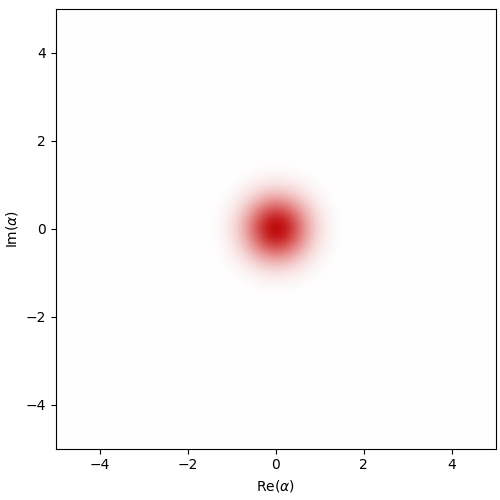

In [ ]:
# @title **Fig. 1.2.1:** The system where the buffer mode is adiabatically eliminated
dq.plot.wigner_gif(res_121.states)

Observe that the Wigner distribution and its evolution over time appears to be very similar to those in the previous section. In order to quantitatively compare the difference in these results, we can compute the fidelity. We find that the distributions differ the most at $t=0.5$, but the fidelity generally stays above $0.95$ at all times.

In [ ]:
fidelity_value_1 = dq.fidelity(A, res_121.states)
time = np.linspace(0, 4, 100)

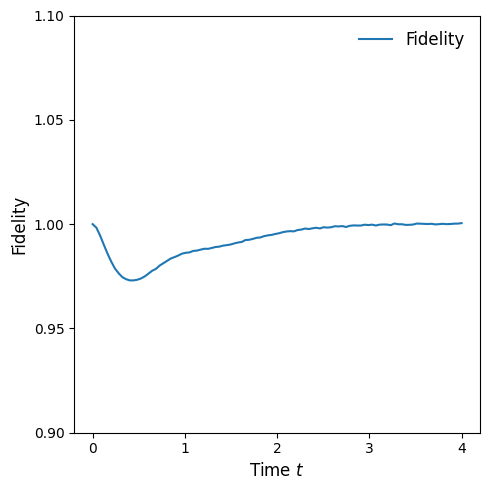

In [ ]:
# @title **Fig. 1.2.2:** Fidelity vs Time
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(time, fidelity_value_1, label="Fidelity")

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0.9, 0.95, 1.0, 1.05, 1.1])

ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Fidelity", fontsize=12)
ax.legend(fontsize=12, frameon=False)

plt.tight_layout()
plt.show()

Now, we observe the effect of modifying the $\kappa_b$ parameter on fidelity:

In [ ]:
na = 20 # Hilbert space dimension
nb = 20


g2 = 1.0
ed = -4.0
kb = 4 # two-photon loss rate

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0)) # initial state
# H = dq.zeros(na) # zero Hamiltonian

H_ = (g2 * a @ a @ b.dag()) + (g2 * a.dag() @ a.dag() @ b) + (ed * b) + (ed * b.dag()) # Hamiltonian

# alpha = 2.0 # cat size
T = 4
tsave = np.linspace(0, T, 100)
loss_op_ = jnp.sqrt(kb) * b # dq.tensor(dq.zeros(na), np.sqrt(kb)*dq.destroy(nb)) # dq.tensor(dq.eye(na), np.sqrt(kb)*(dq.destroy(nb) @ dq.destroy(nb) - alpha**2 * dq.eye(nb))) # loss operator

exp_ops = [dq.dag(a) @ a]

res_112_b = dq.mesolve(H_, [loss_op_], psi0, tsave, exp_ops=exp_ops)
A_b = dq.ptrace(res_112_b.states, 0)

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 56.52s ◆ remaining 0.00ms

100%|██████████| 50/50 [00:44<00:00,  1.13it/s]


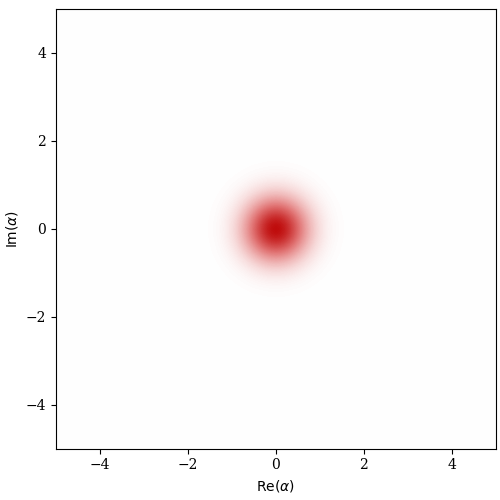

In [ ]:
dq.plot.wigner_gif(A_b)

In [ ]:
fidelity_value_2 = dq.fidelity(A_b, res_121.states)

<ipython-input-29-17bd759e59c5>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')
|██████████| 100.0% ◆ elapsed 53.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 953.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 01m03s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 355.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 01m05s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 428.22ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 01m01s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 169.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 01m07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 147.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 01m18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 260.76ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ el

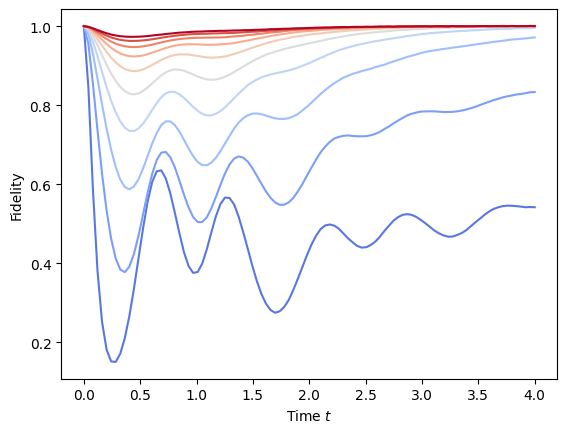

In [ ]:
# @title **Fig. 1.2.3:** Fidelity for multiple values of $\kappa_b$
import matplotlib.cm as cm

cmap = cm.get_cmap('coolwarm')



for i in range(1,11):

    norm_value = i / 10

    #buuuuuuffered state
    na = 20 # Hilbert space dimension
    nb = 20


    g2 = 1.0
    ed = -4.0
    kb = i # two-photon loss rate

    a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilation operator
    b = dq.tensor(dq.eye(na), dq.destroy(nb))
    psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0)) # initial state
    # H = dq.zeros(na) # zero Hamiltonian

    H_ = (g2 * a @ a @ b.dag()) + (g2 * a.dag() @ a.dag() @ b) + (ed * b) + (ed * b.dag()) # Hamiltonian

    # alpha = 2.0 # cat size
    T = 4
    tsave = np.linspace(0, T, 100)
    loss_op_ = jnp.sqrt(kb) * b # dq.tensor(dq.zeros(na), np.sqrt(kb)*dq.destroy(nb)) # dq.tensor(dq.eye(na), np.sqrt(kb)*(dq.destroy(nb) @ dq.destroy(nb) - alpha**2 * dq.eye(nb))) # loss operator

    exp_ops = [dq.dag(a) @ a]

    res_112_b = dq.mesolve(H_, [loss_op_], psi0, tsave, exp_ops=exp_ops)
    A_b = dq.ptrace(res_112_b.states, 0)





    #bufferless state

    #Generating the bufferless system. All interactions are modeled by the loss operator

    na = 20 # Hilbert space dimension


    g2 = 1.0
    ed = -4.0
    kb = i # two-photon loss rate
    kappa_2 = 4 * np.abs(g2)**2 / kb
    alpha = jnp.sqrt(-ed/(g2)) #NOTE THAT THIS ASSUMES THAT G2 IS REAL

    a = dq.destroy(na) # annihilation operator
    psi0 = dq.fock(na, 0) # initial state
    # H = dq.zeros(na) # zero Hamiltonian

    H = dq.zeros(na)

    # alpha = 2.0 # cat size
    T = 4
    tsave = np.linspace(0, T, 100)
    loss_op_new = np.sqrt(kappa_2)*(a @ a - alpha**2 * dq.eye(na))

    exp_ops = [dq.dag(a) @ a]

    res_121_b = dq.mesolve(H, [loss_op_new], psi0, tsave, exp_ops=exp_ops)

    fidelity_value = dq.fidelity(A_b, res_121_b.states)

    plt.plot( time, fidelity_value , label = f'kb = {i}', color=cmap(norm_value))

plt.xlabel('Time $t$')
plt.ylabel('Fidelity')
plt.show()
    # plt.title('Fidelity vs Time (t)')
    # plt.legend()



$\kappa_b=1$ is red and $\kappa_b=10$ is blue. Here we can see that when $\kappa_b$ is low, while we start with high parity (a result of both systems having the same intial state), the parity quickly falls. This divergence comes about because in the buffered model, photons move from the memory into the buffer, and take a certain amount of time before they dissipate. This transient affects mode A's wavefunction because of entanglement between the memory's photons and the photon moved to the buffer. Therefore, that moved photon's effect on the memory photons only approaches 0 after being fully emitted from the buffer. So, if we increase $\kappa_b$, and therefore increase the rate of dissapation, we get less parity loss, as the entanglement only lasts for a moment. This therefore converges to the bufferless model, where there is no entanglement because the photon is directly emitted into the environment with no time delay.

### **Task 1.3:** Performing a Zeno Gate

#### *Part a)* Simulating the rotation of the cat state from the $|+\rangle$ state to the $|-\rangle$ state in a time period $T$.

We implement this by adding an additional $ ϵ_Z (a + a^{\dagger}) $ term to the Hamiltonian. It is easiest to observe this rotation of the state by noticing that the color moves downwards with respect to the crosshair on the plot, switching from red in the middle for the $|+\rangle$ state to blue in the middle for the $|-\rangle$ state.

|          |   0.0% ◆ elapsed 9.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 9.05s ◆ remaining 0.00ms

100%|██████████| 50/50 [00:20<00:00,  2.49it/s]


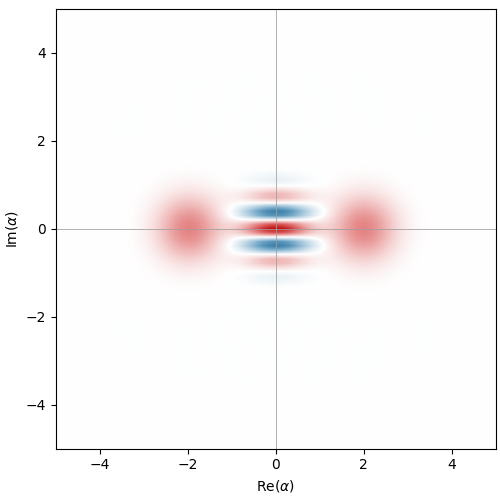

In [ ]:
# @title **Fig. 1.3.1:** Zeno Rotation
na = 20 # Hilbert space dimension
nb = 5

g2 = 1.0
ed = -4.0
kb = 10 # two-photon loss rate
ez = 0.01 # strength of rotation
alpha = jnp.sqrt(-ed/g2) # assuming g_2 is real

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilaiton operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha)), dq.fock(nb, 0)) # initial state

H = (g2 * a.dag() @ a.dag() @ b) + (g2 * a @ a @ b.dag()) + (ed * b) + (ed * b.dag()) + ez * (a + a.dag())# Hamiltonian

theta = jnp.pi
T = theta / 4 / alpha / ez # no two factor for half full rotation

tsave = np.linspace(0, T, 100)
loss_op = jnp.sqrt(kb) * b
# observable to measure (number of photons)
exp_ops = [dq.dag(a) @ a]
res_13a1 = dq.mesolve(H, [loss_op], psi0, tsave, exp_ops=exp_ops)
dq.plot.wigner_gif(dq.ptrace(res_13a1.states, 0), cross=True)

Recall that the parity of the cat state $|+\rangle$ is even (+1) and the parity of the $|-\rangle$ state is odd (-1). We would expect that the parity starts at +1 and evolves continuously to -1 according to a $\cos$ function. The simulated photon number parity matches the theory quite well, as depicted below.

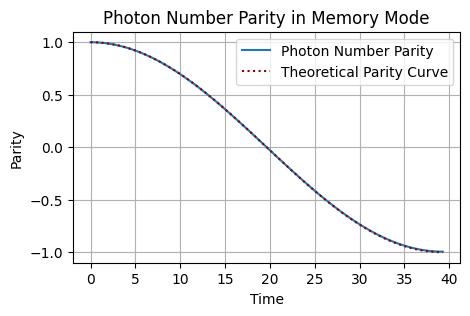

In [ ]:
# @title **Fig 1.3.2:** Parity of rotating cat state
# plot the parity of the memory against time
# the parity of the even cat state |+> is 1 and -1 for the odd cat state |->, so the goal of the gate should be -1 to reach |->

# Define the parity operator for mode A
parity_op = dq.parity(na)

# Compute expectation value of parity over time
A = dq.ptrace(res_13a1.states, 0)
parity_values = np.real(dq.expect(parity_op, A))
np.real(dq.expect(parity_op, A[-1]))

plt.figure(figsize=(5, 3))
plt.plot(tsave, parity_values, label="Photon Number Parity")
plt.plot(tsave, np.cos(tsave * np.pi / T), linestyle='dotted', label="Theoretical Parity Curve", color=dark_red)
plt.xlabel("Time")
plt.ylabel("Parity")
plt.title("Photon Number Parity in Memory Mode")
plt.legend()
plt.grid()
plt.show()

#### *Part b)* Finding optimal rotation times and parameters.

In [ ]:
def get_rotation_result(ka, ez):
  """
  Getting the result of the rotation for a specific ka and ez
  """
  # simulation
  na = 20 # Hilbert space dimension
  nb = 5

  g2 = 1.0
  ed = -4.0
  kb = 10 # two-photon loss rate
  alpha = jnp.sqrt(-ed/g2) # assuming g_2 is real

  a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilaiton operator
  b = dq.tensor(dq.eye(na), dq.destroy(nb))
  psi0 = dq.tensor(dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha)), dq.fock(nb, 0)) # initial state

  H = (g2 * a.dag() @ a.dag() @ b) + (g2 * a @ a @ b.dag()) + (ed * b) + (ed * b.dag()) + ez * (a + a.dag())# Hamiltonian

  theta = jnp.pi
  T = theta / 4 / alpha / ez

  tsave = np.linspace(0, T, 100)
  loss_op = jnp.sqrt(kb) * b

  # Memory mode: losses of single photons
  loss_op_single = jnp.sqrt(ka) * a

  res = dq.mesolve(H, [loss_op, loss_op_single], psi0, tsave)

  return res

Note that we are sweeping through values of ez using a for loop instead of batching because the length of time that captures the gate's rotation varies depending on the ez which affects the tsave array.

|██████████| 100.0% ◆ elapsed 12.15s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 222.74ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 131.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 12.92s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 231.13ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 125.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 15.16s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 243.71ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 127.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 15.50s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.91s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elaps

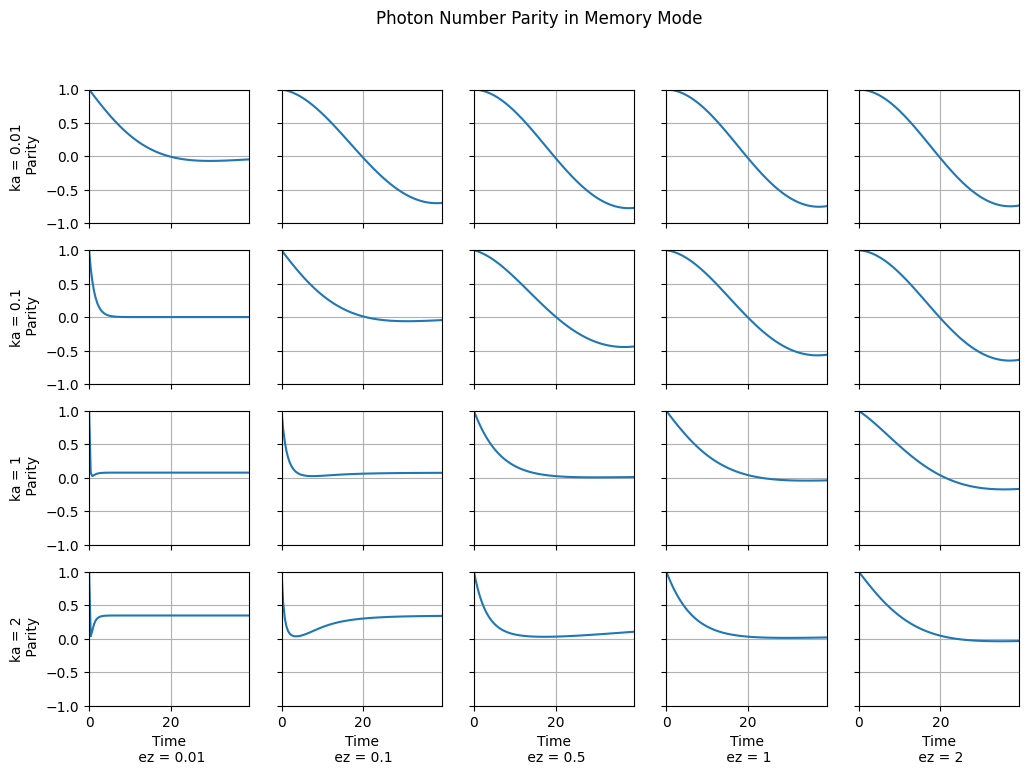

In [ ]:
# @title **Fig. 1.3.3:** $\kappa_a$ and $\epsilon_Z$ parameter sweep
ka_range = [0.01, 0.1, 1, 2]
ez_range = [0.01, 0.1, 0.5, 1, 2]

fig, axs = plt.subplots(len(ka_range), len(ez_range))
fig.suptitle("Photon Number Parity in Memory Mode")
fig.set_size_inches((12, 8))

for i in range(len(ka_range)):
  ka = ka_range[i] # strength of rotation
  for j in range(len(ez_range)):
    ez = ez_range[j] # one-photon loss rate of memory mode

    # Simulation result
    res_temp = get_rotation_result(ka, ez)

    # Define the parity operator for mode A
    parity_op = dq.parity(na)

    # Compute expectation value of parity over time
    A = dq.ptrace(res_temp.states, 0)
    parity_values = np.real(dq.expect(parity_op, A))

    # plot
    axs[i, j].plot(tsave, parity_values, label="Photon Number Parity")
    axs[i, j].set_xlim((0, T))
    axs[i, j].set_ylim((-1,1))
    axs[i, j].set_xlabel(f"Time\n ez = {ez}")
    axs[i, j].set_ylabel(f"ka = {ka}\n Parity")
    axs[i, j].grid()

    axs[i, j].label_outer()

plt.show()

For ka = 0.01, sweeping through ez values and finding the minimum parity the system reaches to determine an estimate for the optimal ez value.

In [ ]:
ka = 0.01

# simulation but batching
na = 20 # Hilbert space dimension
nb = 5

g2 = 1.0
ed = -4.0
kb = 10 # two-photon loss rate
alpha = jnp.sqrt(-ed/g2) # assuming g_2 is real
ez = jnp.linspace(0.2, 0.3, 100)

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilaiton operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha)), dq.fock(nb, 0)) # initial state

H = (g2 * a.dag() @ a.dag() @ b) + (g2 * a @ a @ b.dag()) + (ed * b) + (ed * b.dag()) + ez[:, None, None] * (a + a.dag())# Hamiltonian

theta = jnp.pi
T = 2

tsave = jnp.linspace(0, T, 100)
loss_op = jnp.sqrt(kb) * b

# Memory mode: losses of single photons
loss_op_single = jnp.sqrt(ka) * a

res_13b1 = dq.mesolve(H, [loss_op, loss_op_single], psi0, tsave)

# Define the parity operator for mode A
parity_op = dq.parity(na)

# Compute expectation value of parity over time
A = dq.ptrace(res_13b1.states, 0)
parity_values = np.real(dq.expect(parity_op, A))

|██████████| 100.0% ◆ elapsed 01m02s ◆ remaining 0.00ms


Note that the corresponding optimal value of Tz is slightly smaller than the theoretical value of Tz corresponding to ez as seen in the plots

In [ ]:
ez_idx = np.argmin(np.min(parity_values, axis = 1)) # position of ez with smallest min parity
print(f"Optimal value of ez: {ez[ez_idx]}")
print(f"Theoretical value of Tz: {theta / 4 / alpha / ez[ez_idx]}")
T_idx = np.argmin(parity_values[ez_idx])
print(f"Optimal value of Tz: {tsave[T_idx]}")

Optimal value of ez: 0.28686872124671936
Theoretical value of Tz: 1.3689156770706177
Optimal value of Tz: 1.3333333730697632


### **Task 1.4** Optimizing the driving function $\epsilon_d(t)$ as a function of time.

We seek the function $\epsilon_d(t)$ that minimizes the loss function $1-\text{fidelity}$.



Optimizing for T = 1.0 ...


|██████████| 100.0% ◆ elapsed 446.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 473.09ms ◆ remaining 0.00ms


T =  1.0, Epoch   0: Loss = 0.4295, Fidelity = 0.5849


|██████████| 100.0% ◆ elapsed 422.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 385.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 406.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 412.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 387.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 395.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 672.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 393.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 389.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 376.34ms ◆ remaining 0.00ms


T =  1.0, Epoch  10: Loss = 0.3259, Fidelity = 0.6789


|██████████| 100.0% ◆ elapsed 395.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 385.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 411.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 385.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 405.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 704.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 663.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 394.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 403.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 375.23ms ◆ remaining 0.00ms


T =  1.0, Epoch  20: Loss = 0.3057, Fidelity = 0.6948


|██████████| 100.0% ◆ elapsed 437.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 392.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 401.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 701.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 728.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 401.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 407.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 399.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 413.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 371.54ms ◆ remaining 0.00ms


T =  1.0, Epoch  30: Loss = 0.2955, Fidelity = 0.7060


|██████████| 100.0% ◆ elapsed 385.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 416.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 705.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 404.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 407.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 419.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 396.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 385.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 400.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 389.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 625.96ms ◆ remaining 0.00ms


T =  1.0, Epoch  40: Loss = 0.2825, Fidelity = 0.7184


|██████████| 100.0% ◆ elapsed 710.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 668.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 383.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 390.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 401.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 381.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 385.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 390.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 380.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 676.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 435.89ms ◆ remaining 0.00ms


T =  1.0, Epoch  50: Loss = 0.2757, Fidelity = 0.7249


|██████████| 100.0% ◆ elapsed 415.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 397.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 384.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 397.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 393.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 392.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 409.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 666.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 690.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 390.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 378.18ms ◆ remaining 0.00ms


T =  1.0, Epoch  60: Loss = 0.2705, Fidelity = 0.7299


|██████████| 100.0% ◆ elapsed 398.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 386.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 394.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 389.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 395.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 402.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 629.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 395.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 385.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 391.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 373.62ms ◆ remaining 0.00ms


T =  1.0, Epoch  70: Loss = 0.2670, Fidelity = 0.7333


|██████████| 100.0% ◆ elapsed 382.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 397.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 402.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 391.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 672.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 659.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 395.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 360.35ms ◆ remaining 0.00ms


T =  1.0, Epoch  80: Loss = 0.2643, Fidelity = 0.7360


|██████████| 100.0% ◆ elapsed 392.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 411.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 394.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 641.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 393.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 411.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 395.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 405.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 393.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 350.95ms ◆ remaining 0.00ms


T =  1.0, Epoch  90: Loss = 0.2620, Fidelity = 0.7382


|██████████| 100.0% ◆ elapsed 405.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 686.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 713.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 388.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 405.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 398.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 384.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 414.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 400.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 391.79ms ◆ remaining 0.00ms


Final Fidelity for T = 1.0: 0.7399


Optimizing for T = 2.0 ...


|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms


T =  2.0, Epoch   0: Loss = 0.0933, Fidelity = 0.9119


|██████████| 100.0% ◆ elapsed 2.78s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.69s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.63s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 3.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms 


T =  2.0, Epoch  10: Loss = 0.0621, Fidelity = 0.9396


|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.73s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.77s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms


T =  2.0, Epoch  20: Loss = 0.0508, Fidelity = 0.9498


|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.64s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms 


T =  2.0, Epoch  30: Loss = 0.0460, Fidelity = 0.9543


|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.86s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.76s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms


T =  2.0, Epoch  40: Loss = 0.0436, Fidelity = 0.9566


|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.55s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.52s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms 


T =  2.0, Epoch  50: Loss = 0.0424, Fidelity = 0.9577


|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.53s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms


T =  2.0, Epoch  60: Loss = 0.0415, Fidelity = 0.9586


|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms


T =  2.0, Epoch  70: Loss = 0.0409, Fidelity = 0.9591


|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.84s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms


T =  2.0, Epoch  80: Loss = 0.0404, Fidelity = 0.9596


|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.50s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.90s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.92s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms 


T =  2.0, Epoch  90: Loss = 0.0401, Fidelity = 0.9600


|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.98s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms 


Final Fidelity for T = 2.0: 0.9603


Optimizing for T = 3.0 ...


|██████████| 100.0% ◆ elapsed 826.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 804.81ms ◆ remaining 0.00ms


T =  3.0, Epoch   0: Loss = 0.0197, Fidelity = 0.9815


|██████████| 100.0% ◆ elapsed 877.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.54s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms   


T =  3.0, Epoch  10: Loss = 0.0110, Fidelity = 0.9895


|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.50s ◆ remaining 0.00ms


T =  3.0, Epoch  20: Loss = 0.0081, Fidelity = 0.9921


|██████████| 100.0% ◆ elapsed 2.75s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.49s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 967.38ms ◆ remaining 0.00ms


T =  3.0, Epoch  30: Loss = 0.0071, Fidelity = 0.9930


|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.86s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.99s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.01s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms


T =  3.0, Epoch  40: Loss = 0.0067, Fidelity = 0.9933


|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.00s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms   


T =  3.0, Epoch  50: Loss = 0.0065, Fidelity = 0.9935


|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.98s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.92s ◆ remaining 0.00ms 


T =  3.0, Epoch  60: Loss = 0.0064, Fidelity = 0.9936


|██████████| 100.0% ◆ elapsed 1.62s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.94s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms 


T =  3.0, Epoch  70: Loss = 0.0063, Fidelity = 0.9937


|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms


T =  3.0, Epoch  80: Loss = 0.0062, Fidelity = 0.9938


|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.58s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.96s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms


T =  3.0, Epoch  90: Loss = 0.0062, Fidelity = 0.9938


|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.79s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms


Final Fidelity for T = 3.0: 0.9939


Optimizing for T = 4.0 ...


|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.00s ◆ remaining 0.00ms   


T =  4.0, Epoch   0: Loss = 0.0042, Fidelity = 0.9957


|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.83s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.90s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.88s ◆ remaining 0.00ms


T =  4.0, Epoch  10: Loss = 0.0021, Fidelity = 0.9981


|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms


T =  4.0, Epoch  20: Loss = 0.0015, Fidelity = 0.9986


|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.74s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.62s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.84s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.94s ◆ remaining 0.00ms


T =  4.0, Epoch  30: Loss = 0.0013, Fidelity = 0.9987


|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms


T =  4.0, Epoch  40: Loss = 0.0012, Fidelity = 0.9988


|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms


T =  4.0, Epoch  50: Loss = 0.0011, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.85s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.96s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms


T =  4.0, Epoch  60: Loss = 0.0011, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.95s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.89s ◆ remaining 0.00ms


T =  4.0, Epoch  70: Loss = 0.0011, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.60s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms 


T =  4.0, Epoch  80: Loss = 0.0011, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms 


T =  4.0, Epoch  90: Loss = 0.0011, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.93s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.51s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms


Final Fidelity for T = 4.0: 0.9989


Optimizing for T = 5.0 ...


|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms


T =  5.0, Epoch   0: Loss = 0.0009, Fidelity = 0.9986


|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.21s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.02s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.53s ◆ remaining 0.00ms


T =  5.0, Epoch  10: Loss = 0.0005, Fidelity = 0.9996


|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.55s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms


T =  5.0, Epoch  20: Loss = 0.0003, Fidelity = 0.9997


|██████████| 100.0% ◆ elapsed 1.49s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.49s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.49s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.00s ◆ remaining 0.00ms


T =  5.0, Epoch  30: Loss = 0.0003, Fidelity = 0.9997


|██████████| 100.0% ◆ elapsed 1.51s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.79s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms


T =  5.0, Epoch  40: Loss = 0.0002, Fidelity = 0.9998


|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.35s ◆ remaining 0.00ms 


T =  5.0, Epoch  50: Loss = 0.0002, Fidelity = 0.9998


|██████████| 100.0% ◆ elapsed 2.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.99s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.42s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms


T =  5.0, Epoch  60: Loss = 0.0002, Fidelity = 0.9998


|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.42s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms


T =  5.0, Epoch  70: Loss = 0.0002, Fidelity = 0.9998


|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.53s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.50s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms


T =  5.0, Epoch  80: Loss = 0.0002, Fidelity = 0.9998


|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.53s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.76s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.46s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms


T =  5.0, Epoch  90: Loss = 0.0002, Fidelity = 0.9998


|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.73s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms


Final Fidelity for T = 5.0: 0.9998



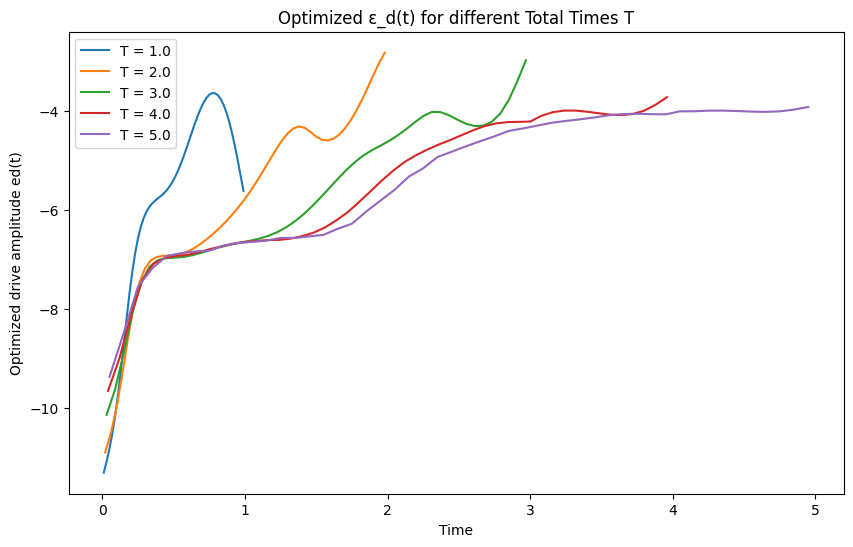

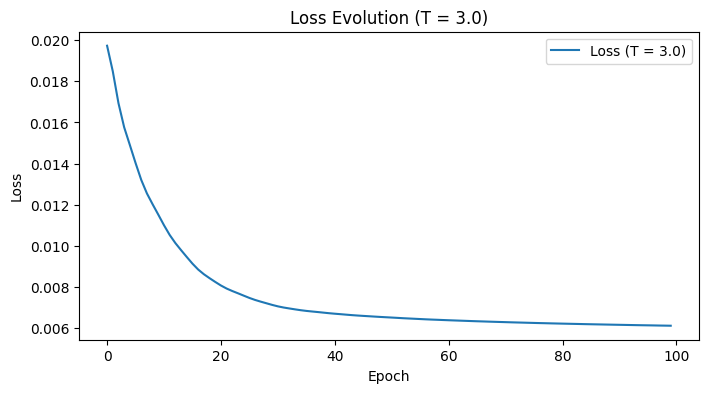

In [ ]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np


na = 20             # Memory mode Hilbert space dimension
nb = 5              # Buffer mode Hilbert space dimension
g2 = 1.0            # Two-photon exchange coupling strength
kb = 10.0           # Loss rate for the buffer mode

# Operators and initial state (these can be reused)
a = dq.tensor(dq.destroy(na), dq.eye(nb))
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Fixed Hamiltonian term: two-photon exchange
H0 = g2 * (a @ a @ b.dag()) + g2 * (a.dag() @ a.dag() @ b)

# Collapse operator acting on the buffer mode, and expectation operator
loss_op = jnp.sqrt(kb) * b
exp_ops = [dq.dag(a) @ a]

# Target cat state (in memory mode) with alpha = 2:
alpha = 2.0
target_cat = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))


def optimize_ed(T_val, num_epochs=100, learning_rate=0.1):
    """
    Optimize the time-dependent drive epsilon_d(t) for a given total simulation time T_val.
    Returns:
      tpulse_mid: midpoints of the pulse time intervals (as a numpy array)
      ed_opt: optimized drive amplitudes (numpy array, one value per interval)
      final_fid: final fidelity between the simulated memory state and the target cat state.
    """
    # Create simulation time grid for mesolve:
    tsave = jnp.linspace(0, T_val, 100)

    # Create a time grid for the piecewise-constant control pulse:
    ntpulse = 51  # number of grid points => 50 intervals
    tpulse = jnp.linspace(0, T_val, ntpulse)

    # Initialize the drive parameters. (We start with -4.0 as in the constant case.)
    ed_seed = -4.0 * jnp.ones(ntpulse - 1, dtype=jnp.float32)

    # Build the time-dependent drive Hamiltonian from ed(t)
    def H_d_of_ed(ed_params):
        # dq.pwc constructs a time-dependent operator on the grid tpulse.
        return dq.pwc(tpulse, ed_params, b + b.dag())

    # Total Hamiltonian: H(t) = H0 + H_d(t)
    def total_H(ed_params):
        return H0 + H_d_of_ed(ed_params)

    # Simulation function: returns the final memory state (partial trace over buffer)
    def simulate(ed_params):
        H_total = total_H(ed_params)
        result = dq.mesolve(H_total, [loss_op], psi0, tsave, exp_ops=exp_ops)
        rho_final = result.states[-1]
        rho_memory = dq.ptrace(rho_final, 0)
        return rho_memory

    # Fidelity: compare final memory state with the target cat state.
    def fidelity_from_params(ed_params):
        rho_mem = simulate(ed_params)
        fid = dq.fidelity(rho_mem, target_cat)
        return fid

    # Loss function: we want to maximize fidelity, so we minimize (1 - fidelity)
    def loss_fn(ed_params):
        fid = fidelity_from_params(ed_params)
        return 1.0 - fid

    # Set up the optimizer (Adam from optax)
    optimizer = optax.adam(learning_rate)
    opt_state = optimizer.init(ed_seed)
    ed_params = ed_seed

    num_epochs = int(num_epochs)
    loss_history = []

    # jit-compile the optimization step for speed.
    @jax.jit
    def step_fn(ed_params, opt_state):
        loss_val, grads = jax.value_and_grad(loss_fn)(ed_params)
        updates, new_opt_state = optimizer.update(grads, opt_state)
        new_ed_params = optax.apply_updates(ed_params, updates)
        return loss_val, new_ed_params, new_opt_state

    for epoch in range(num_epochs):
        loss_val, ed_params, opt_state = step_fn(ed_params, opt_state)
        loss_history.append(loss_val)
        if epoch % 10 == 0:
            fid_val = fidelity_from_params(ed_params)
            print(f"T = {T_val:4.1f}, Epoch {epoch:3d}: Loss = {loss_val:.4f}, Fidelity = {fid_val:.4f}")

    # Final simulation with optimized parameters:
    final_rho = simulate(ed_params)
    final_fid = dq.fidelity(final_rho, target_cat)
    # Compute the midpoints of each time interval for plotting:
    tpulse_mid = 0.5 * (tpulse[:-1] + tpulse[1:])
    return np.array(tpulse_mid), np.array(ed_params), float(final_fid), np.array(loss_history)


T_values = [1.0, 2.0, 3.0, 4.0, 5.0]  # try three different total times
results = {}

for T_val in T_values:
    print(f"\nOptimizing for T = {T_val} ...")
    tpulse_mid, ed_opt, final_fid, loss_history = optimize_ed(T_val, num_epochs=100, learning_rate=0.1)
    results[T_val] = {"tpulse_mid": tpulse_mid, "ed_opt": ed_opt, "final_fid": final_fid, "loss_history": loss_history}
    print(f"Final Fidelity for T = {T_val}: {final_fid:.4f}\n")


plt.figure(figsize=(10, 6))
for T_val in T_values:
    r = results[T_val]
    plt.plot(r["tpulse_mid"], r["ed_opt"], label=f"T = {T_val}")
plt.xlabel("Time")
plt.ylabel("Optimized drive amplitude ed(t)")
plt.title("Optimized ε_d(t) for different Total Times T")
plt.legend()
plt.show()

# Optionally, plot loss evolution for one T value (e.g., T = 3)
plt.figure(figsize=(8, 4))
plt.plot(results[3.0]["loss_history"], label="Loss (T = 3.0)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Evolution (T = 3.0)")
plt.legend()
plt.show()


In [ ]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------------------------------
# Global System Constants (These remain fixed across T values)
# -----------------------------------------------------------------------------
na = 20             # Memory mode Hilbert space dimension
nb = 5              # Buffer mode Hilbert space dimension
g2 = 1.0            # Two-photon exchange coupling strength
kb = 10.0           # Loss rate for the buffer mode

# Operators and initial state (these can be reused)
a = dq.tensor(dq.destroy(na), dq.eye(nb))
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Fixed Hamiltonian term: two-photon exchange
H0 = g2 * (a @ a @ b.dag()) + g2 * (a.dag() @ a.dag() @ b)

# Collapse operator acting on the buffer mode, and expectation operator
loss_op = jnp.sqrt(kb) * b
exp_ops = [dq.dag(a) @ a]

# Target cat state (in memory mode) with alpha = 2:
alpha = 2.0
target_cat = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))


In [ ]:


# -----------------------------------------------------------------------------
# Define a function that performs optimization for a given total time T_val.
# -----------------------------------------------------------------------------
def optimize_ed(T_val, num_epochs=100, learning_rate=0.1,
                w_photon=0.1, w_smooth=1e-4):
    """
    Optimize the time-dependent drive epsilon_d(t) for a given total simulation time T_val.
    The total loss is defined as:
      L_total = (1 - fidelity) + w_photon*(<n> - alpha^2)^2 + w_smooth*sum_i |ed[i+1]-ed[i]|^2.

    Returns:
      tpulse_mid: midpoints of the pulse time intervals (as a numpy array)
      ed_opt: optimized drive amplitudes (numpy array, one value per interval)
      final_fid: final fidelity between the simulated memory state and the target cat state.
      loss_history: array of loss values over epochs.
    """
    # Create simulation time grid for mesolve:
    tsave = jnp.linspace(0, T_val, 100)

    # Create a time grid for the piecewise-constant control pulse:
    ntpulse = 51  # number of grid points => 50 intervals
    tpulse = jnp.linspace(0, T_val, ntpulse)

    # Initialize the drive parameters. (We start with -4.0 as in the constant case.)
    ed_seed = -4.0 * jnp.ones(ntpulse - 1, dtype=jnp.float32)

    # Build the time-dependent drive Hamiltonian from ed(t)
    def H_d_of_ed(ed_params):
        # dq.pwc constructs a time-dependent operator on the grid tpulse.
        return dq.pwc(tpulse, ed_params, b + b.dag())

    # Total Hamiltonian: H(t) = H0 + H_d(t)
    def total_H(ed_params):
        return H0 + H_d_of_ed(ed_params)

    # Simulation function: returns the final memory state (partial trace over buffer)
    def simulate(ed_params):
        H_total = total_H(ed_params)
        result = dq.mesolve(H_total, [loss_op], psi0, tsave, exp_ops=exp_ops)
        rho_final = result.states[-1]
        rho_memory = dq.ptrace(rho_final, 0)
        return rho_memory

    # Fidelity: compare final memory state with the target cat state.
    def fidelity_from_params(ed_params):
        rho_mem = simulate(ed_params)
        fid = dq.fidelity(rho_mem, target_cat)
        return fid

    # Photon loss: penalize deviation of the photon number from alpha^2.
    def photon_loss(ed_params, target_photon=alpha**2):
        rho_mem = simulate(ed_params)
        # Construct the memory-mode annihilation operator (acting only on memory mode)
        a_mem = dq.destroy(na)
        n_op = a_mem.dag() @ a_mem
        exp_n = jnp.real(dq.trace(rho_mem @ n_op))
        return (exp_n - target_photon)**2

    # Smoothness loss: penalize large differences between adjacent ed values.
    def smoothness_loss(ed_params):
        diffs = jnp.diff(ed_params)
        return jnp.sum(jnp.abs(diffs)**2)

    # Total loss: combine fidelity, photon loss, and smoothness loss.
    def loss_fn(ed_params):
        fid_loss = 1.0 - fidelity_from_params(ed_params)
        ph_loss = w_photon * photon_loss(ed_params)
        sm_loss = w_smooth * smoothness_loss(ed_params)
        return fid_loss + ph_loss + sm_loss

    # Set up the optimizer (Adam from optax)
    optimizer = optax.adam(learning_rate)
    opt_state = optimizer.init(ed_seed)
    ed_params = ed_seed

    num_epochs = int(num_epochs)
    loss_history = []

    # jit-compile the optimization step for speed.
    @jax.jit
    def step_fn(ed_params, opt_state):
        loss_val, grads = jax.value_and_grad(loss_fn)(ed_params)
        updates, new_opt_state = optimizer.update(grads, opt_state)
        new_ed_params = optax.apply_updates(ed_params, updates)
        return loss_val, new_ed_params, new_opt_state

    for epoch in range(num_epochs):
        loss_val, ed_params, opt_state = step_fn(ed_params, opt_state)
        loss_history.append(loss_val)
        if epoch % 10 == 0:
            fid_val = fidelity_from_params(ed_params)
            print(f"T = {T_val:4.1f}, Epoch {epoch:3d}: Loss = {loss_val:.4f}, Fidelity = {fid_val:.4f}")

    # Final simulation with optimized parameters:
    final_rho = simulate(ed_params)
    final_fid = dq.fidelity(final_rho, target_cat)
    # Compute the midpoints of each time interval for plotting:
    tpulse_mid = 0.5 * (tpulse[:-1] + tpulse[1:])
    return np.array(tpulse_mid), np.array(ed_params), float(final_fid), np.array(loss_history)


In [ ]:
# -----------------------------------------------------------------------------
# Run the optimization for different total times T
# -----------------------------------------------------------------------------
T_values = [1.0, 2.0, 3.0, 4.0]  # try three different total times
results = {}

for T_val in T_values:
    print(f"\nOptimizing for T = {T_val} ...")
    tpulse_mid, ed_opt, final_fid, loss_history = optimize_ed(T_val, num_epochs=100, learning_rate=0.1)
    results[T_val] = {"tpulse_mid": tpulse_mid, "ed_opt": ed_opt, "final_fid": final_fid, "loss_history": loss_history}
    print(f"Final Fidelity for T = {T_val}: {final_fid:.4f}\n")



Optimizing for T = 1.0 ...


|██████████| 100.0% ◆ elapsed 877.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 621.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 365.18ms ◆ remaining 0.00ms


T =  1.0, Epoch   0: Loss = 1.0584, Fidelity = 0.5849


|██████████| 100.0% ◆ elapsed 458.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 352.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 452.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 351.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 481.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 335.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 821.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 605.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 445.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 379.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 424.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 340.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 453.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 370.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 445.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 513.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 514.31ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  10: Loss = 0.5805, Fidelity = 0.6800


|██████████| 100.0% ◆ elapsed 442.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 373.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 448.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 370.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 788.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 448.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 439.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 386.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 459.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 348.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 498.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 353.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 834.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 628.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 454.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 378.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 440.23ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  20: Loss = 0.3590, Fidelity = 0.6812


|██████████| 100.0% ◆ elapsed 766.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 643.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 461.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 361.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 435.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 363.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 458.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 374.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 456.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 346.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 594.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 378.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 447.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 392.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 778.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 415.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 442.80ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  30: Loss = 0.3442, Fidelity = 0.6547


|██████████| 100.0% ◆ elapsed 475.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 340.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 464.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 358.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 478.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 349.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 818.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 638.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 470.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 347.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 490.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 353.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 446.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 347.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 804.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 634.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 444.92ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  40: Loss = 0.3440, Fidelity = 0.6575


|██████████| 100.0% ◆ elapsed 469.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 361.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 473.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 582.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 443.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 380.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 485.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 341.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 439.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 343.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 455.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 362.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 779.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 498.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 452.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 374.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 479.48ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  50: Loss = 0.3301, Fidelity = 0.6758


|██████████| 100.0% ◆ elapsed 800.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 659.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 455.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 381.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 458.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 356.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 474.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 353.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 837.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 634.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 499.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 369.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 446.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 378.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 450.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 559.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 709.93ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  60: Loss = 0.3252, Fidelity = 0.6882


|██████████| 100.0% ◆ elapsed 461.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 375.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 459.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 345.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 461.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 519.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 489.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 372.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 441.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 384.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 444.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 346.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 466.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 345.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 761.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 658.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 465.97ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  70: Loss = 0.3216, Fidelity = 0.6922


|██████████| 100.0% ◆ elapsed 475.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 373.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 808.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 670.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 476.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 343.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 472.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 380.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 464.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 377.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 565.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 650.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 451.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 353.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 449.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 363.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 449.77ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  80: Loss = 0.3176, Fidelity = 0.6927


|██████████| 100.0% ◆ elapsed 618.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 345.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 463.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 344.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 435.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 364.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 452.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 365.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 810.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 647.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 462.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 348.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 484.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 344.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 455.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 373.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 768.92ms ◆ remaining 0.00ms
|██████████| 1

T =  1.0, Epoch  90: Loss = 0.3144, Fidelity = 0.6945


|██████████| 100.0% ◆ elapsed 480.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 345.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 503.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 368.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 478.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 629.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 423.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 384.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 460.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 374.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 466.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 351.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 465.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 347.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 878.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 438.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 471.43ms ◆ remaining 0.00ms
|██████████| 1

Final Fidelity for T = 1.0: 0.6977


Optimizing for T = 2.0 ...


|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms


T =  2.0, Epoch   0: Loss = 0.1243, Fidelity = 0.9119


|██████████| 100.0% ◆ elapsed 1.62s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.54s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.73s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.98s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.56s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|████████

T =  2.0, Epoch  10: Loss = 0.0714, Fidelity = 0.9324


|██████████| 100.0% ◆ elapsed 2.79s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.88s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.57s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms
|███████

T =  2.0, Epoch  20: Loss = 0.0551, Fidelity = 0.9489


|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.04s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.90s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.53s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.98s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████

T =  2.0, Epoch  30: Loss = 0.0477, Fidelity = 0.9525


|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.80s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.94s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|████████

T =  2.0, Epoch  40: Loss = 0.0449, Fidelity = 0.9556


|██████████| 100.0% ◆ elapsed 1.93s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.48s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.15s ◆ remaining 0.00ms
|████████

T =  2.0, Epoch  50: Loss = 0.0435, Fidelity = 0.9567


|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.52s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.53s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.73s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████

T =  2.0, Epoch  60: Loss = 0.0426, Fidelity = 0.9577


|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.62s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.97s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.99s ◆ remaining 0.00ms
|█████████

T =  2.0, Epoch  70: Loss = 0.0419, Fidelity = 0.9583


|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|█████████

T =  2.0, Epoch  80: Loss = 0.0415, Fidelity = 0.9589


|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.40s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|████████

T =  2.0, Epoch  90: Loss = 0.0411, Fidelity = 0.9592


|██████████| 100.0% ◆ elapsed 1.99s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.74s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.27s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████

Final Fidelity for T = 2.0: 0.9596


Optimizing for T = 3.0 ...


|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 812.63ms ◆ remaining 0.00ms


T =  3.0, Epoch   0: Loss = 0.0212, Fidelity = 0.9815


|██████████| 100.0% ◆ elapsed 931.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 824.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.84s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.80s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.57s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.79s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00ms   
|

T =  3.0, Epoch  10: Loss = 0.0110, Fidelity = 0.9894


|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 977.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 969.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 988.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 983.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 924.64ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remainin

T =  3.0, Epoch  20: Loss = 0.0082, Fidelity = 0.9920


|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 928.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.00s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 2.02s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.52s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.00s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining

T =  3.0, Epoch  30: Loss = 0.0072, Fidelity = 0.9929


|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.49s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.83s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms
|

T =  3.0, Epoch  40: Loss = 0.0068, Fidelity = 0.9933


|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.95s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.80s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.93s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.94s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.92s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms

T =  3.0, Epoch  50: Loss = 0.0066, Fidelity = 0.9935


|██████████| 100.0% ◆ elapsed 2.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.47s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.72s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.03s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|█████████

T =  3.0, Epoch  60: Loss = 0.0065, Fidelity = 0.9936


|██████████| 100.0% ◆ elapsed 1.57s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.57s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.26s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.44s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.93s ◆ remaining 0.00ms 
|███████

T =  3.0, Epoch  70: Loss = 0.0064, Fidelity = 0.9937


|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.90s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|███████

T =  3.0, Epoch  80: Loss = 0.0064, Fidelity = 0.9937


|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.78s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.03s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.00s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.84s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.96s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.35s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|█████████

T =  3.0, Epoch  90: Loss = 0.0063, Fidelity = 0.9938


|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.36s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.97s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.34s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.99s ◆ remaining 0.00ms
|███████

Final Fidelity for T = 3.0: 0.9938


Optimizing for T = 4.0 ...


|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.00s ◆ remaining 0.00ms   


T =  4.0, Epoch   0: Loss = 0.0042, Fidelity = 0.9957


|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 972.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.96s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 961.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 969.84ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.51s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.38s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00

T =  4.0, Epoch  10: Loss = 0.0021, Fidelity = 0.9981


|██████████| 100.0% ◆ elapsed 1.54s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.87s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.70s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.85s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 995.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.86s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.01s ◆ remaining 0.00m

T =  4.0, Epoch  20: Loss = 0.0015, Fidelity = 0.9986


|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.92s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.03s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.99s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining

T =  4.0, Epoch  30: Loss = 0.0013, Fidelity = 0.9988


|██████████| 100.0% ◆ elapsed 1.45s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.55s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.43s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.51s ◆ remaining 0.00ms
|████████

T =  4.0, Epoch  40: Loss = 0.0012, Fidelity = 0.9988


|██████████| 100.0% ◆ elapsed 1.33s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.42s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|█████████

T =  4.0, Epoch  50: Loss = 0.0012, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.32s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|█████████

T =  4.0, Epoch  60: Loss = 0.0012, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 2.05s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.98s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.16s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.37s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms
|█████████

T =  4.0, Epoch  70: Loss = 0.0012, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.76s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.92s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.92s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.95s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.09s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.04s ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 1.65s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.27s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.10s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|█████

T =  4.0, Epoch  80: Loss = 0.0012, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.88s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.31s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.12s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.19s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.81s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.39s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.83s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.22s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|███

T =  4.0, Epoch  90: Loss = 0.0012, Fidelity = 0.9989


|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 2.17s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.18s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.06s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.24s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.84s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.04s ◆ remaining 0.00ms   
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.28s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.13s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.41s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.15s ◆ remaining 0.00ms
|███

Final Fidelity for T = 4.0: 0.9989



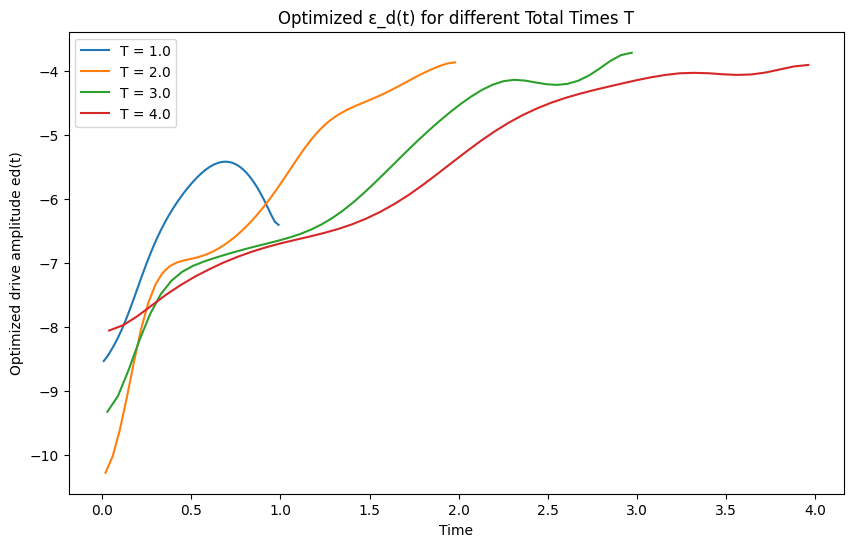

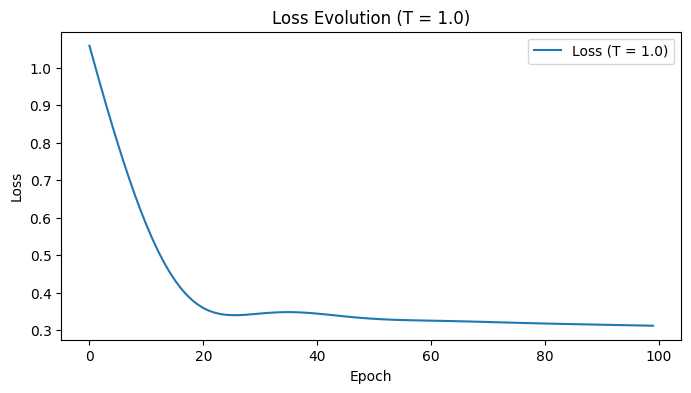

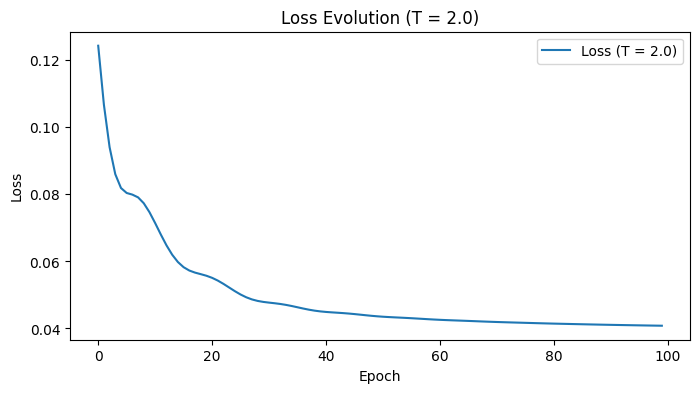

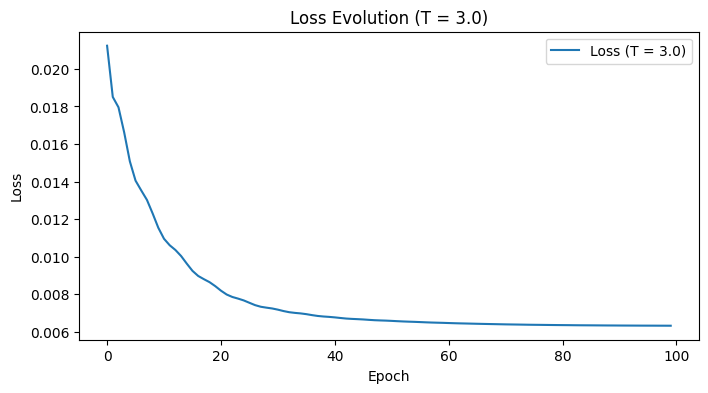

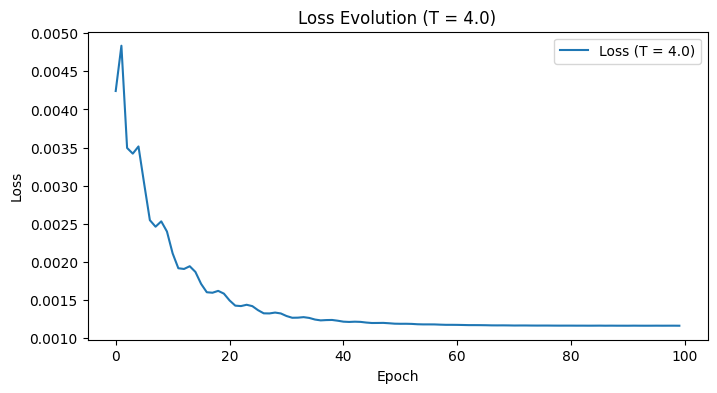

In [ ]:
# -----------------------------------------------------------------------------
# Plot the optimized drive for each T value on one figure
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
for T_val in T_values:
    r = results[T_val]
    plt.plot(r["tpulse_mid"], r["ed_opt"], label=f"T = {T_val}")
plt.xlabel("Time")
plt.ylabel("Optimized drive amplitude ed(t)")
plt.title("Optimized ε_d(t) for different Total Times T")
plt.legend()
plt.show()

# Optionally, plot loss evolution for one T value (e.g., T = 3)
plt.figure(figsize=(8, 4))
plt.plot(results[1.0]["loss_history"], label="Loss (T = 1.0)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Evolution (T = 1.0)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(results[2.0]["loss_history"], label="Loss (T = 2.0)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Evolution (T = 2.0)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(results[3.0]["loss_history"], label="Loss (T = 3.0)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Evolution (T = 3.0)")
plt.legend()
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(results[4.0]["loss_history"], label="Loss (T = 4.0)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Evolution (T = 4.0)")
plt.legend()
plt.show()

|██████████| 100.0% ◆ elapsed 357.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.23s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 1.07s ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 2.01s ◆ remaining 0.00ms


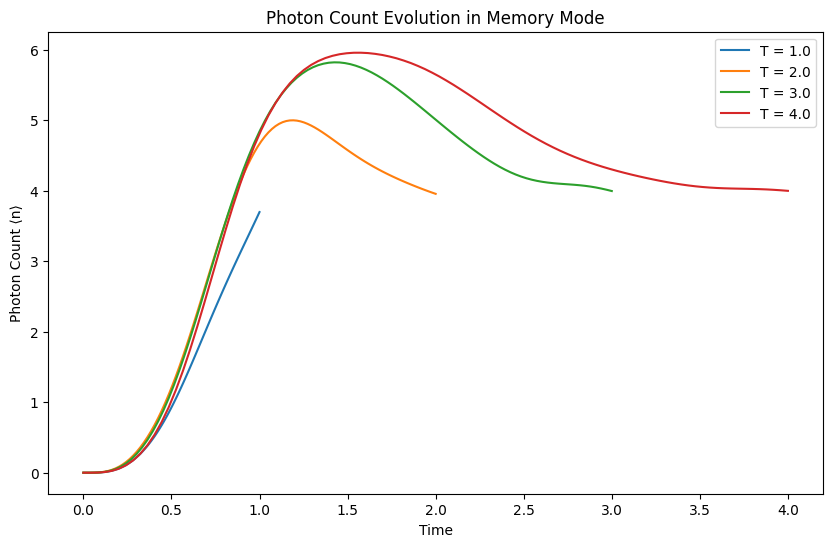

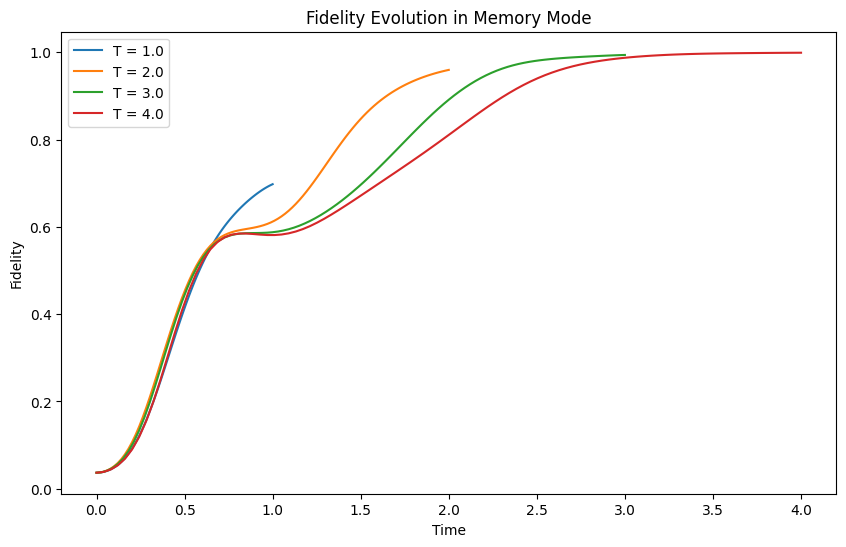

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import dynamiqs as dq


# --- If you need a fallback for T_values: ---
T_values = [1.0, 2.0, 3.0, 4.0]

# For each T, re-run the simulation using the optimized drive parameters.
# We will update each results[T] dictionary with keys "photon_count" and "fidelity_scores".
for T_val in T_values:
    # Get the optimized drive parameters for this T.
    if T_val not in results:
        print(f"No results found for T = {T_val}; skipping.")
        continue
    ed_opt = results[T_val]["ed_opt"]  # optimized drive amplitudes (array of length ntpulse-1)

    # Reconstruct the time grid for the piecewise drive.
    ntpulse = len(ed_opt) + 1
    tpulse = np.linspace(0, T_val, ntpulse)  # using numpy here is fine
    # Build the drive Hamiltonian using dq.pwc:
    # (Recall: H_d(t) = ε_d(t) * (b + b.dag()))
    H_d = dq.pwc(tpulse, ed_opt, b + b.dag())

    # Total Hamiltonian:
    H_total = H0 + H_d

    # Create a simulation time grid for mesolve:
    tsave = jnp.linspace(0, T_val, 100)

    # Run the simulation with the optimized drive.
    sim_result = dq.mesolve(H_total, [loss_op], psi0, tsave, exp_ops=exp_ops)

    # For each time step, compute the reduced density matrix for the memory mode,
    # then compute the photon count and fidelity.
    photon_counts = []
    fidelities = []
    # Create the memory-mode annihilation operator (acting only on memory)
    a_mem = dq.destroy(na)
    n_op = a_mem.dag() @ a_mem
    for state in sim_result.states:
        rho_mem = dq.ptrace(state, 0)
        # Photon count:
        n_val = jnp.real(dq.trace(rho_mem @ n_op))
        photon_counts.append(n_val)
        # Fidelity (for pure target, fidelity = <target|rho|target>):
        fid = dq.fidelity(rho_mem, target_cat)
        fidelities.append(fid)


    sim_result.expects[0].real

    # Convert to numpy arrays and store in results[T_val]
    results[T_val]["time"] = np.array(tsave)
    results[T_val]["photon_count"] = np.array(photon_counts)
    results[T_val]["fidelity_scores"] = np.array(fidelities)

# -----------------------------------------------------------------------------
# Now, plot the photon count evolution and fidelity evolution for each T.
# -----------------------------------------------------------------------------

# Plot Photon Count Evolution:
plt.figure(figsize=(10, 6))
for T_val in T_values:
    if "photon_count" in results[T_val]:
        plt.plot(results[T_val]["time"], results[T_val]["photon_count"],
                 label=f"T = {T_val}")
    else:
        print(f"Photon count data not available for T = {T_val}")
plt.xlabel("Time")
plt.ylabel("Photon Count ⟨n⟩")
plt.title("Photon Count Evolution in Memory Mode")
plt.legend()
plt.show()

# Plot Fidelity Evolution:
plt.figure(figsize=(10, 6))
for T_val in T_values:
    if "fidelity_scores" in results[T_val]:
        plt.plot(results[T_val]["time"], results[T_val]["fidelity_scores"],
                 label=f"T = {T_val}")
    else:
        print(f"Fidelity data not available for T = {T_val}")
plt.xlabel("Time")
plt.ylabel("Fidelity")
plt.title("Fidelity Evolution in Memory Mode")
plt.legend()
plt.show()
